# Applied Statistics and Probabilities Course For Students

### 1. Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pathlib import Path
from scipy.stats import skew, kurtosis, shapiro

### 2. Load data

In [2]:
# delcare the columns
COLS = [
	"area",
	"perimeter",
	"compactness",
	"length_of_kernel",
	"width_of_kernel",
	"asymmetry_coefficient",
	"length_of_kernel_groove",
	"class"
]


In [3]:
# functions to read  and clean the seeds dataset
def read_seeds_csv():
    try:
        df = pd.read_csv('seeds.csv', skipinitialspace = True)
        if set(COLS).issubset(df.columns):
            return df
        raise ValueError("CSV file does not contain the required columns.")
    except Exception:
        df = pd.read_csv('seeds.csv', header=None, names=COLS, skipinitialspace = True)

# preprocessing function
def clean_data(df: pd.DataFrame) -> pd.DataFrame:
    return df

In [4]:
# show the first 5 rows of the dataset
df = read_seeds_csv()
df.head()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,class
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### 3. Descriptive data

In [5]:
df.describe() # recreate this table

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,class
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [6]:
# descriptive statistics table
def descriptive_table(df: pd.DataFrame) -> pd.DataFrame: 
    num_cols = [c for c in df.columns if c != 'class' and pd.api.types.is_numeric_dtype(df[c])]
    desc = df[num_cols].describe(percentiles=[0.05, 0.25, .5, .75, .95]).T
    desc.rename(columns = {"50%": "median"}, inplace = True)
    extra = pd.DataFrame(index = num_cols)
    extra["var"] = df[num_cols].var()
    extra["cv"] = df[num_cols].std() / df[num_cols].mean()
    q1 = df[num_cols].quantile(0.25)
    q3 = df[num_cols].quantile(0.75)
    extra["iqr"] = q3 - q1
    extra["skewness"] = df[num_cols].apply(skew)
    extra["kurtosis"] = df[num_cols].apply(kurtosis)
    return desc.join(extra)


In [7]:
def iqr_outliers_report(df: pd.DataFrame) -> pd.DataFrame:
    num_cols = [c for c in df.columns if c != 'class' and pd.api.types.is_numeric_dtype(df[c])]
    rows = []
    n = len(df)
    for c in num_cols:
        s = df[c].dropna()
        q1, q3 = s.quantile([0.25, 0.75])
        iqr = q3 - q1
        lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
        out_mask = (s < lower) | (s > upper)
        rows.append({
            "feature": c,
            "q1": q1,
            "q3": q3,
            "iqr": iqr,
            "lower_bound": lower,
            "upper_bound": upper,
            "outliers_count": int(out_mask.sum()),
            "outliers_percentage": int(out_mask.sum()) / n * 100 if n > 0 else np.nan,
        })
    return pd.DataFrame(rows).set_index("feature")

In [8]:
descriptive_table(df) # quartile, mean, median, mode, variance, std, skewness, kurtosis

,count,mean,std,min,5%,25%,median,75%,95%,max,var,cv,iqr,skewness,kurtosis
area,210.0,14.847524,2.909699,10.5900,11.180000,12.27000,14.35500,17.305000,19.54300,21.1800,8.466351,0.195972,5.035000,0.397027,-1.087058
perimeter,210.0,14.559286,1.305959,12.4100,12.860000,13.45000,14.32000,15.715000,16.73100,17.2500,1.705528,0.089699,2.265000,0.383806,-1.108964
compactness,210.0,0.870999,0.023629,0.8081,0.825915,0.85690,0.87345,0.887775,0.90533,0.9183,0.000558,0.027129,0.030875,-0.534104,-0.165432
length_of_kernel,210.0,5.628533,0.443063,4.8990,5.081400,5.26225,5.52350,5.979750,6.44720,6.6750,0.196305,0.078717,0.717500,0.521721,-0.795499
width_of_kernel,210.0,3.258605,0.377714,2.6300,2.693900,2.94400,3.23700,3.561750,3.85865,4.0330,0.142668,0.115913,0.617750,0.133416,-1.100171
asymmetry_coefficient,210.0,3.700201,1.503557,0.7651,1.467600,2.56150,3.59900,4.768750,6.17780,8.4560,2.260684,0.406345,2.207250,0.398793,-0.093464
length_of_kernel_groove,210.0,5.408071,0.491480,4.5190,4.782450,5.04500,5.22300,5.877000,6.27300,6.5500,0.241553,0.090879,0.832000,0.557876,-0.849342


In [9]:
iqr_outliers_report(df)

,q1,q3,iqr,lower_bound,upper_bound,outliers_count,outliers_percentage
feature,,,,,,,
area,12.27000,17.305000,5.035000,4.717500,24.857500,0,0.000000
perimeter,13.45000,15.715000,2.265000,10.052500,19.112500,0,0.000000
compactness,0.85690,0.887775,0.030875,0.810588,0.934087,3,1.428571
length_of_kernel,5.26225,5.979750,0.717500,4.186000,7.056000,0,0.000000
width_of_kernel,2.94400,3.561750,0.617750,2.017375,4.488375,0,0.000000
asymmetry_coefficient,2.56150,4.768750,2.207250,-0.749375,8.079625,2,0.952381
length_of_kernel_groove,5.04500,5.877000,0.832000,3.797000,7.125000,0,0.000000


### 4. Distributions

In [ ]:
# ploting 
def show_histograms(df: pd.DataFrame):
    num_cols = [c for c in df.columns] # list comprehension
    k = len(num_cols)
    rows = int(np.ceil(k / 3))
    cols = 3
    fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
    axes = np.array(axes).reshape(-1)
    
    for i, c in enumerate(num_cols):
        ax = axes[i]
        ax.hist(df[c].dropna(), bins=20, edgecolor='black')
        ax.set_title(f'Histogram of {c}')
        ax.set_xlabel(c)
        ax.set_ylabel('Frequency')  

    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j])  # remove unused subplots
    
    fig.suptitle('Histograms of Numerical Features', fontsize=16)
    fig.tight_layout()
    plt.show()

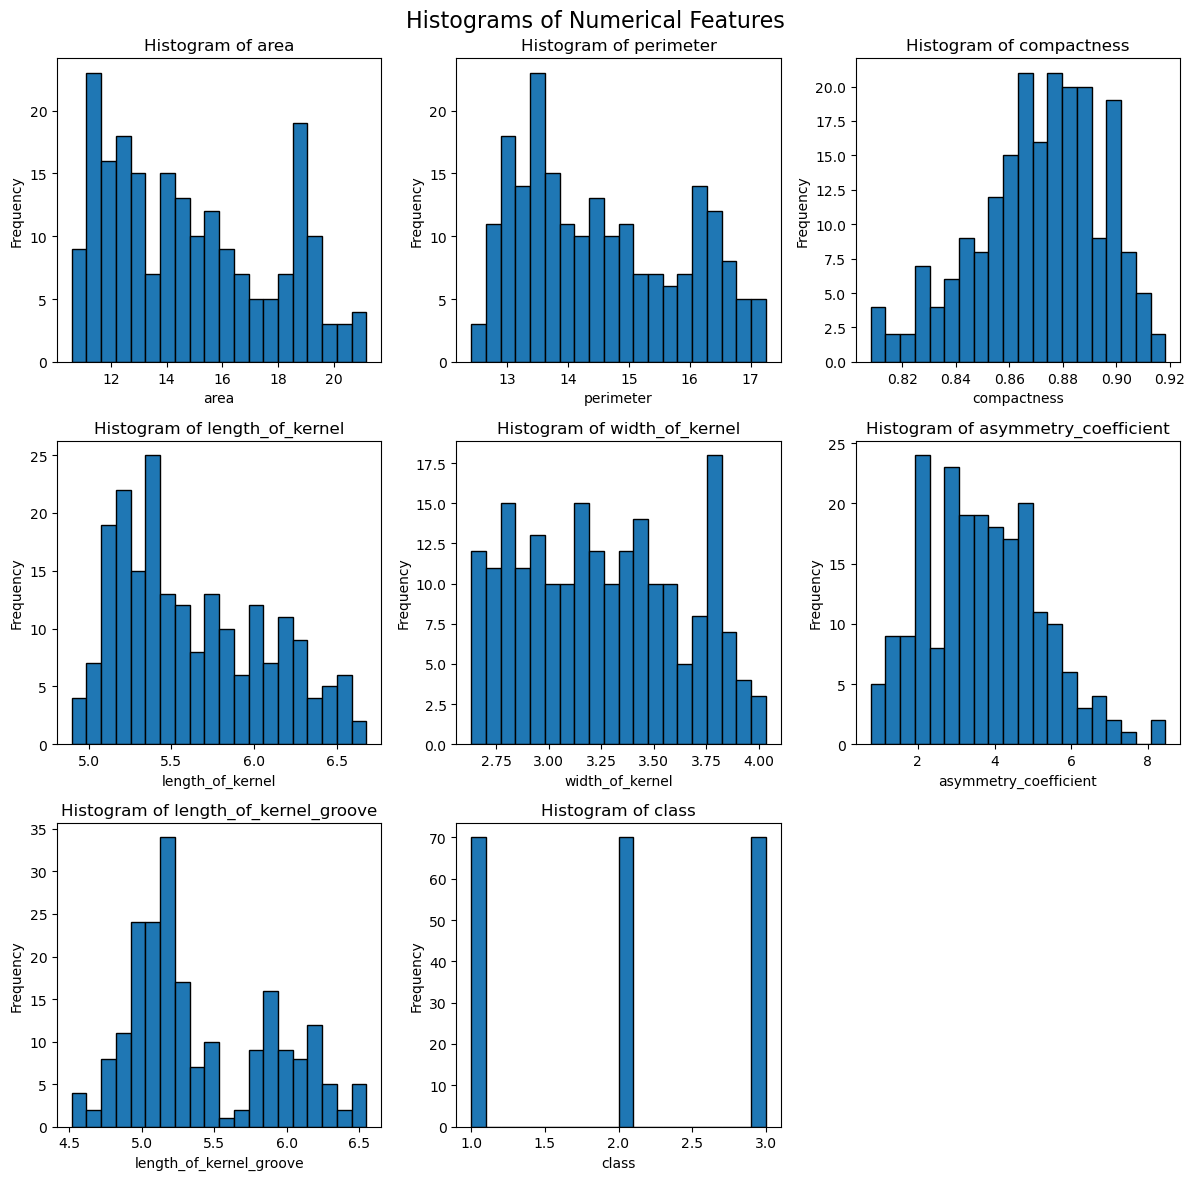

In [13]:
show_histograms(df)

In [14]:
# ploting 
def show_boxplots_by_classes(df: pd.DataFrame):
    classes = list(df['class'])
    num_cols = [c for c in df.columns] # list comprehension
    k = len(num_cols)
    rows = int(np.ceil(k / 3))
    cols = 3
    fig, axes = plt.subplots(rows, cols, figsize=(12, 4 * rows))
    axes = np.array(axes).reshape(-1)
    
    for i, c in enumerate(num_cols):
        ax = axes[i]
        data = [df.loc[df['class'] == cls, c].dropna() for cls in classes]
        ax.boxplot(data, labels = [str(cls) for cls in classes], showfliers=True)
        ax.set_title(f'BOXPLOT PER CLASSESS of {c}')
        ax.set_xlabel("class")
        ax.set_ylabel(c)  

    for j in range(i + 1, rows * cols):
        fig.delaxes(axes[j])  # remove unused subplots

    fig.suptitle('Boxplots on classes', fontsize=16)
    fig.tight_layout()
    plt.show()

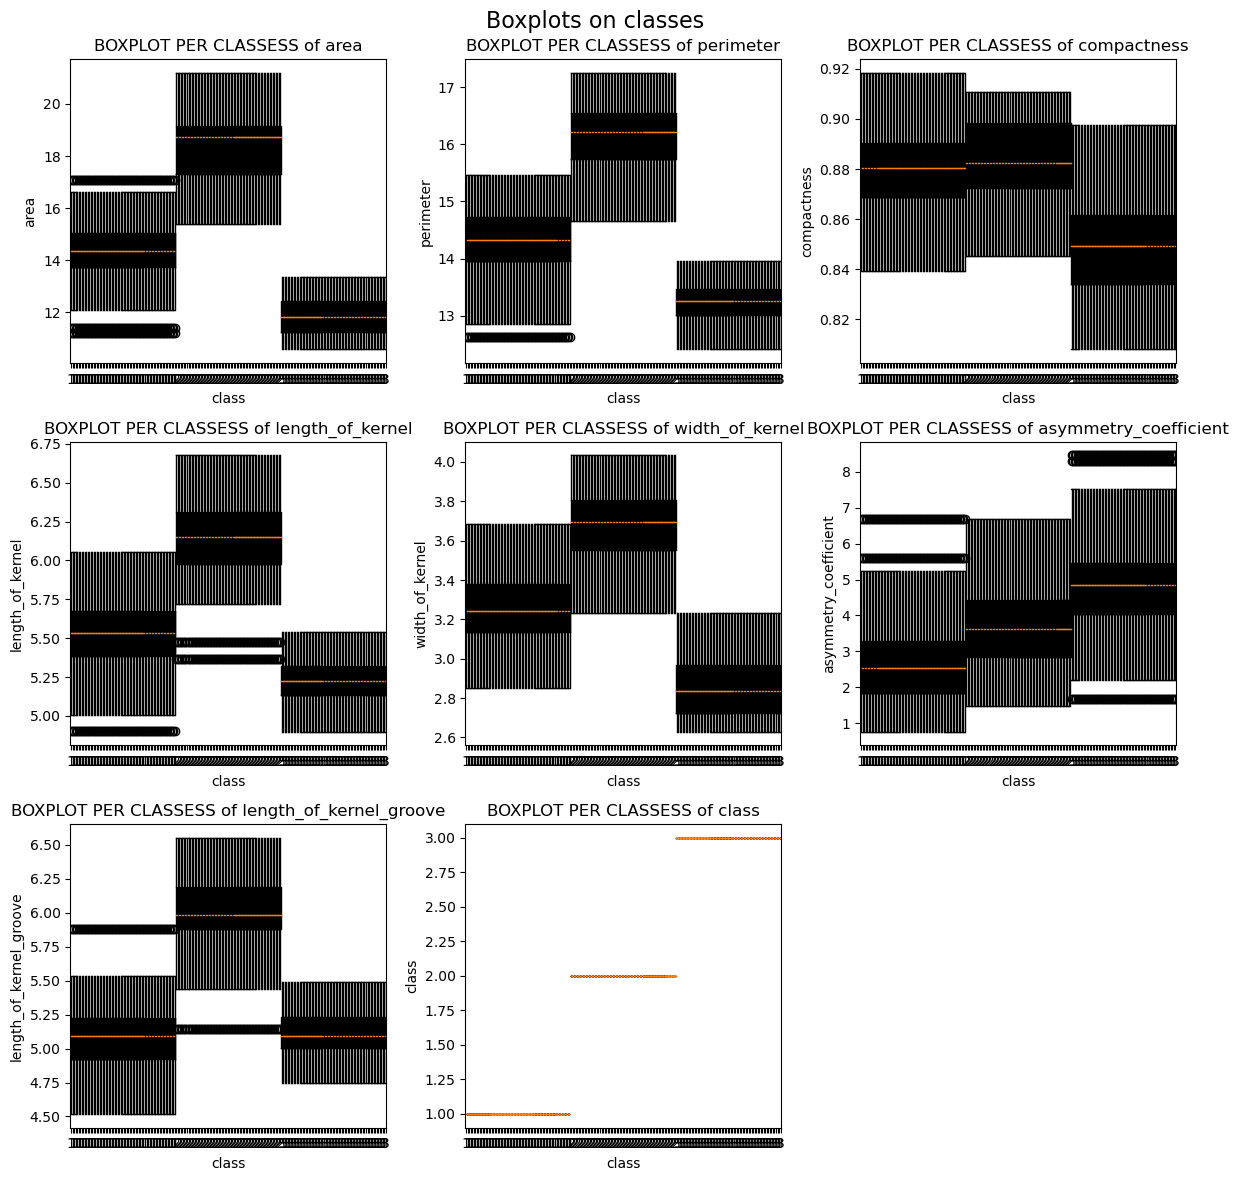

In [15]:
show_boxplots_by_classes(df)

### 5.